In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


## Run scripts on cluster

In [2]:
def create_cluster_script(thresholds, tissues):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/AUC.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        #out_file.write("#$ -t 1-6\n".format(len(thresholds)))
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=5G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set tissues=({0})\n".format(" ".join(tissues)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set tissue=$tissues[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.tissue.R $threshold $tissue\n")
                       
        out_file.write("date\n")

In [3]:
tissue_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.csv', index_col=0)

In [4]:
# first MHC-I only (driver, passenger, germline); then both (driver, passenger, germline)
tissues = list(tissue_df.Tissue.unique())
thresholds = ['2']*len(tissues)

create_cluster_script(thresholds, tissues)

In [5]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv', 
                                index_col=0)

In [6]:
patient_mutations.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-DH-A7UV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DH-A7UT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DH-A7UU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DH-A7UR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DH-A7US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
tissue_df.head()

,Tissue
TCGA-02-0001,GBM
TCGA-02-0003,GBM
TCGA-02-0004,GBM
TCGA-02-0006,GBM
TCGA-02-0007,GBM


In [9]:
for tissue in tissues:
    print tissue, patient_mutations.ix[list(tissue_df[tissue_df.Tissue == tissue].index)].sum().sum()

GBM 317.0
OV 123.0
LUAD 465.0
LUSC 385.0
PRAD 119.0
UCEC 275.0
BLCA 401.0
TGCT 16.0
ESCA nan
PAAD 229.0
KIRP 33.0
LIHC 175.0
CESC 24.0
SARC nan
BRCA 181.0
THYM nan
MESO 13.0
COAD 684.0
STAD 433.0
SKCM 783.0
CHOL nan
KIRC 34.0
THCA 334.0
HNSC 466.0
READ 176.0
LGG 705.0
DLBC 14.0
KICH 8.0
UCS 95.0
ACC 20.0
PCPG 19.0
UVM 18.0
LAML nan


In [8]:
tissues_over_100 = list(tissue_df.Tissue.value_counts()[tissue_df.Tissue.value_counts() > 100].index)

### Visualize results

Tissue specific mutations

In [48]:
tissue = 'THCA'
tissue_auc = []
for model in ['MHC_I', 'MHC_II', 'Both']:
    try:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.muts_in_{0}.{1}.2.data.txt'.format(tissue, model),
                   sep=' ')
        #print tissue, model, metrics.roc_auc_score(df.label, df.predicted_prob)
        print np.mean(metrics.precision_recall_curve(df.label, df.predicted_prob)[0])
    except:
        None
    
    print float(len(df[df.label == 1]))/len(df)

0.153474028322
0.0793103448276
0.140744568432
0.0819704433498
0.18172471868
0.0795566502463


In [7]:
# the difference between random precision and actual precision
all_auc, tissues_used = [], []
for tissue in tissues_over_100:
    print tissue
    tissue_auc = []
    for model in ['MHC_I', 'MHC_II', 'Both']:
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.muts_in_{0}.{1}.2.data.shuffled.txt'.format(tissue, model),
                       sep=' ')
            #print tissue, model, metrics.roc_auc_score(df.label, df.predicted_prob)
            tissue_auc.append(np.mean(metrics.precision_recall_curve(df.label, df.predicted_prob)[0]) / (float(len(df[df.label == 1]))/len(df)))
        except:
            None
    if len(tissue_auc) == 3:
        tissues_used.append(tissue)
        all_auc.append(tissue_auc)

BRCA
GBM
OV
LUAD
UCEC
KIRC
HNSC
LGG
THCA
LUSC
PRAD
SKCM
COAD
STAD
BLCA
LIHC
CESC
KIRP
SARC
PAAD
ESCA
PCPG
READ
TGCT
LAML
THYM
KICH


In [8]:
auc_df = pd.DataFrame(all_auc)
auc_df.columns = ['MHC_I', 'MHC_II', 'Both']
auc_df.index = tissues_used

In [9]:
auc_df

,MHC_I,MHC_II,Both
BRCA,1.387162,1.265332,1.646038
GBM,0.983488,1.313552,1.266754
OV,0.790706,0.914062,1.004491
LUAD,1.080648,1.122414,1.292999
UCEC,1.027725,0.785431,0.742395
KIRC,0.441309,0.369102,0.366773
HNSC,1.048557,0.937472,1.056675
LGG,1.556357,1.618265,1.998580
THCA,1.870840,1.570904,1.967226
LUSC,0.896890,0.901966,0.876195


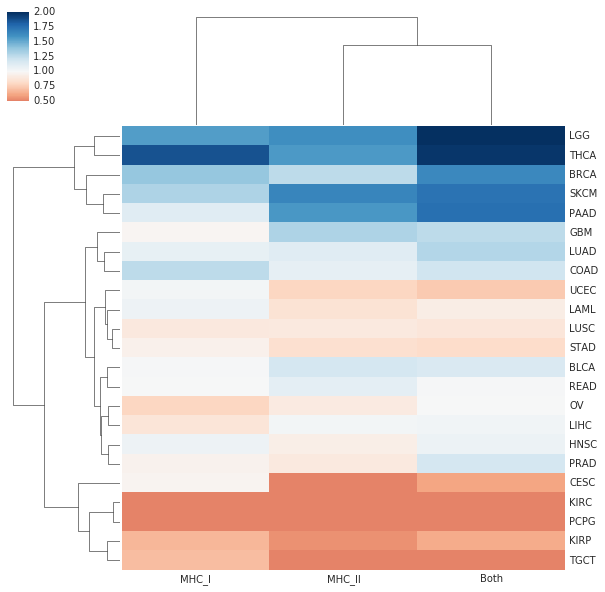

In [10]:
# shuffled
plt.figure(figsize=(6, 8))
sns.clustermap(all_auc, xticklabels=['MHC_I', 'MHC_II', 'Both'], yticklabels=tissues_used,
           cmap='RdBu', vmin=0.5, vmax=2, center=1)

In [60]:
auc_df

,MHC_I,MHC_II,Both
BRCA,1.139094,1.326618,1.499444
GBM,1.020656,1.134719,1.212392
OV,0.966638,0.963240,1.070218
LUAD,1.111666,1.103096,1.291936
UCEC,0.852431,0.878054,0.829043
KIRC,0.256973,0.232525,0.244761
HNSC,1.031878,1.031525,0.998223
LGG,1.414393,1.674649,1.903005
THCA,1.935107,1.717016,2.284218
LUSC,0.858919,1.001375,1.061179


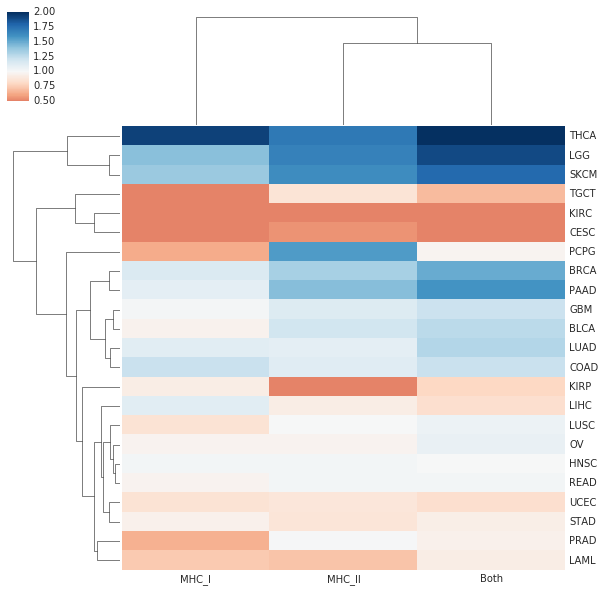

In [73]:
plt.figure(figsize=(6, 8))
sns.clustermap(all_auc, xticklabels=['MHC_I', 'MHC_II', 'Both'], yticklabels=tissues_used,
           cmap='RdBu', vmin=0.5, vmax=2, center=1)

All mutations

In [11]:
all_auc, tissues_used = [], []
for tissue in tissues_over_100:
    print tissue
    tissue_auc = []
    for model in ['MHC_I', 'MHC_II', 'Both']:
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.{0}.{1}.2.data.txt'.format(tissue, model),
                       sep=' ')
            #print tissue, model, metrics.roc_auc_score(df.label, df.predicted_prob)
            tissue_auc.append(np.mean(metrics.precision_recall_curve(df.label, df.predicted_prob)[0]) - float(len(df[df.label == 1]))/len(df))
        except:
            None
    if len(tissue_auc) == 3:
        tissues_used.append(tissue)
        all_auc.append(tissue_auc)

BRCA
GBM
OV
LUAD
UCEC
KIRC
HNSC
LGG
THCA
LUSC
PRAD
SKCM
COAD
STAD
BLCA
LIHC
CESC
KIRP
SARC
PAAD
ESCA
PCPG
READ
TGCT
LAML
THYM
KICH


In [14]:
auc_df = pd.DataFrame(all_auc)
auc_df.columns = ['MHC_I', 'MHC_II', 'Both']
auc_df.index = tissues_used

In [15]:
auc_df

,MHC_I,MHC_II,Both
BRCA,0.000951,0.000973,0.000989
GBM,0.001038,0.001222,0.001152
OV,0.000616,0.000880,0.000978
LUAD,0.001224,0.001209,0.001419
UCEC,0.004031,0.003764,0.004448
KIRC,0.000070,0.000145,0.000114
HNSC,0.001124,0.001249,0.001226
LGG,0.002484,0.003474,0.003895
THCA,0.001829,0.002246,0.002948
LUSC,0.001067,0.001221,0.001265


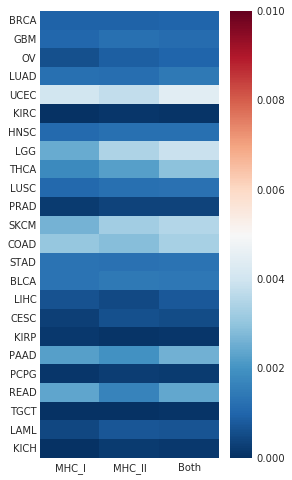

In [16]:
plt.figure(figsize=(4, 8))
sns.heatmap(all_auc, xticklabels=['MHC_I', 'MHC_II', 'Both'], yticklabels=tissues_used,
           cmap='RdBu_r', vmin=0, vmax=0.01)

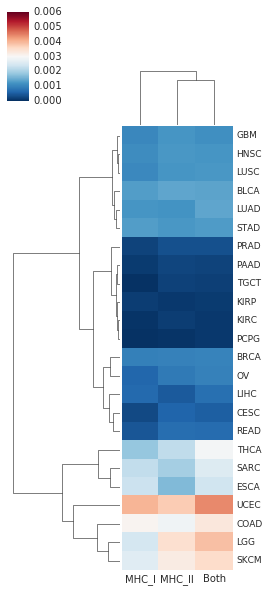

In [18]:
cm = sns.clustermap(all_auc, xticklabels=['MHC_I', 'MHC_II', 'Both'], yticklabels=tissues_over_100,
           cmap='RdBu_r', vmin=0, vmax=0.006)
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=9)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/matched_models/tissue.AUC_PR.pdf')

Pan-cancer precision recall

In [9]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)

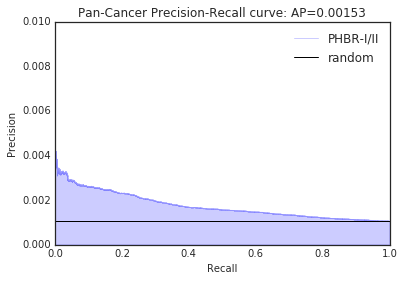

In [13]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_2.2.10.data.txt',
                       sep=' ')
precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)
random = float(len(df[df.label == 1]))/len(df)
plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.axhline(random, c='k')

plt.legend(('PHBR-I/II', 'random',))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.01])
plt.xlim([0.0, 1.0])
plt.title('Pan-Cancer Precision-Recall curve: AP={0}'.format(round(np.mean(precision), 5)))

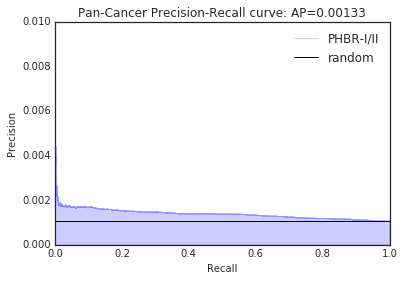

In [14]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_2.2.10.data.txt',
                       sep=' ')
precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)
random = float(len(df[df.label == 1]))/len(df)
plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.axhline(random, c='k')

plt.legend(('PHBR-I/II', 'random',))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.01])
plt.xlim([0.0, 1.0])
plt.title('Pan-Cancer Precision-Recall curve: AP={0}'.format(round(np.mean(precision), 5)))

0.0010462524224
0.00104753263338
0.00133308922459


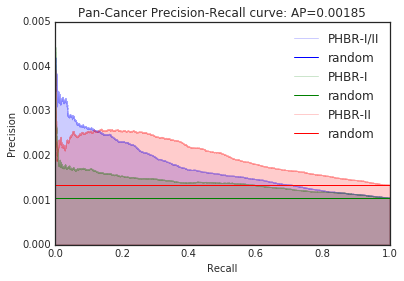

In [19]:
for cat, col in zip(['both_classes', 'mhc_i', 'mhc_ii'], ['b', 'g', 'r']):
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{0}.model_2.2.10.data.txt'.format(cat),
                           sep=' ')
    precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)
    random = float(len(df[df.label == 1]))/len(df)
    plt.step(recall, precision, color=col, alpha=0.2,
                 where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color=col)
    print random

    plt.axhline(random, c=col)


plt.legend(('PHBR-I/II', 'random', 'PHBR-I', 'random', 'PHBR-II', 'random',))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.005])
plt.xlim([0.0, 1.0])
plt.title('Pan-Cancer Precision-Recall curve: AP={0}'.format(round(np.mean(precision), 5)))

Specific tissues

BRCA


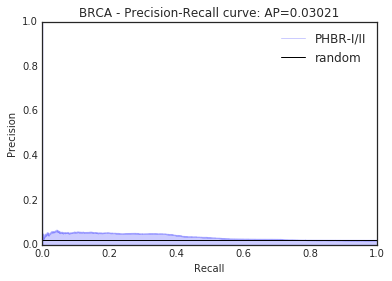

GBM


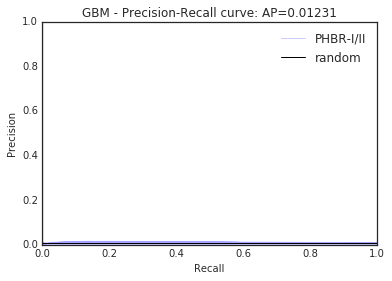

OV


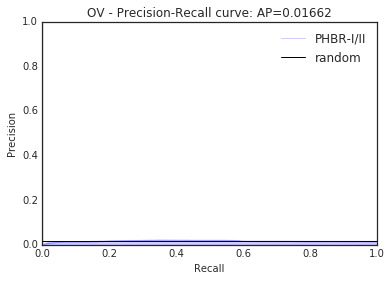

LUAD


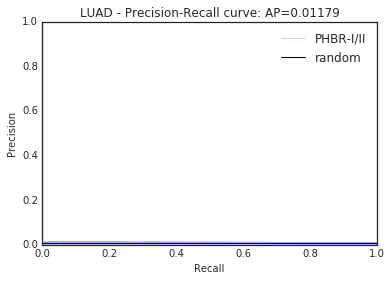

UCEC


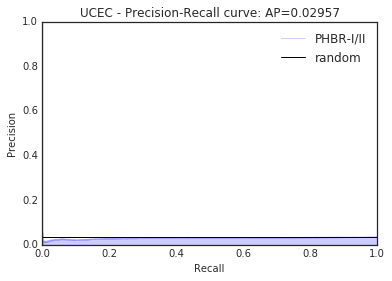

KIRC


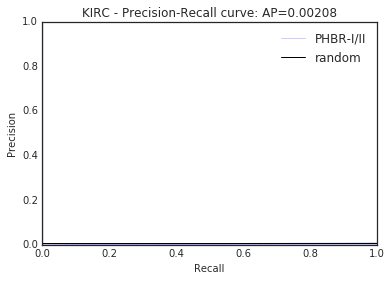

HNSC


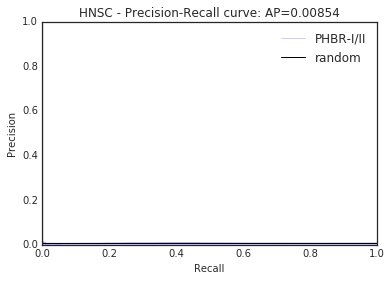

LGG


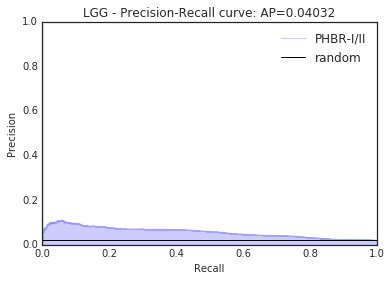

THCA


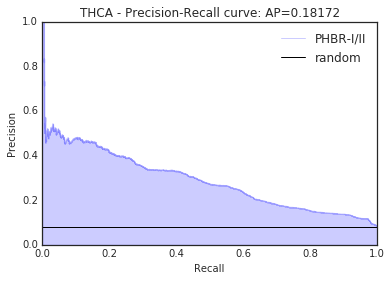

LUSC


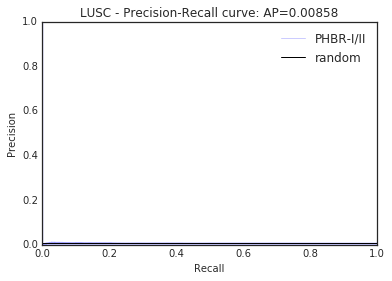

PRAD


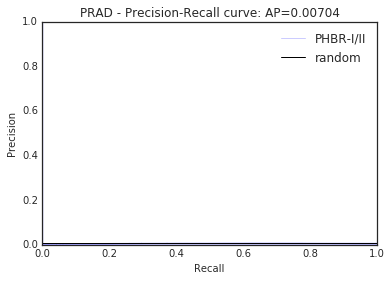

SKCM


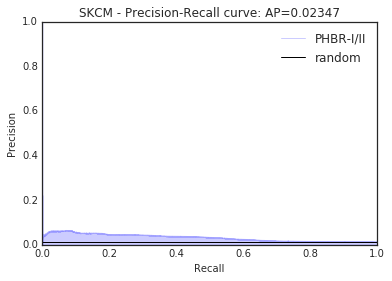

COAD


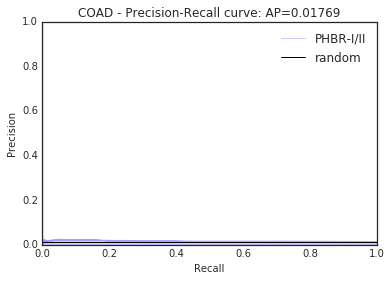

STAD


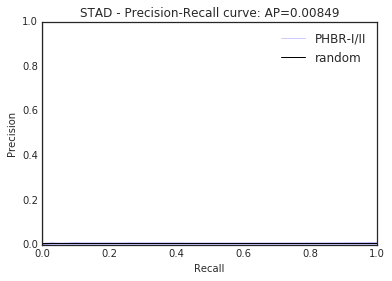

BLCA


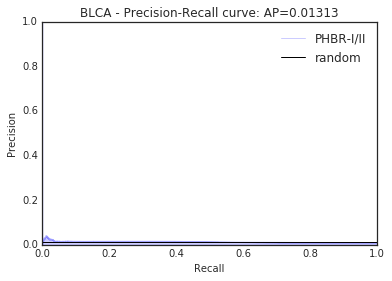

LIHC


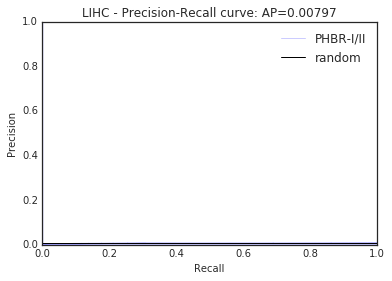

CESC


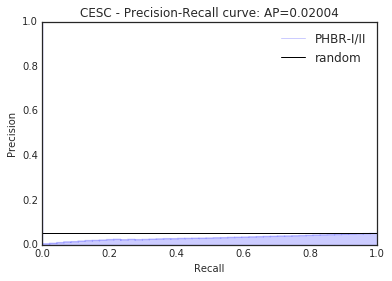

KIRP


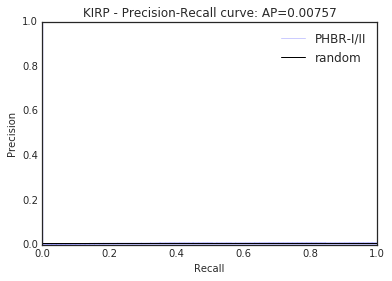

SARC
PAAD


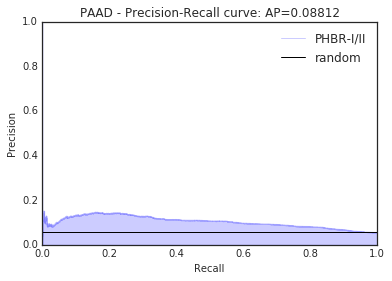

ESCA
PCPG


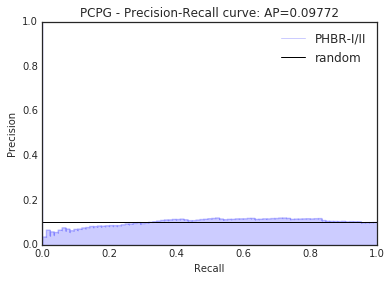

READ


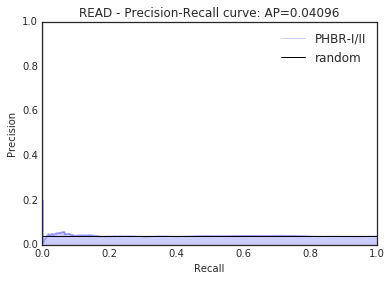

TGCT


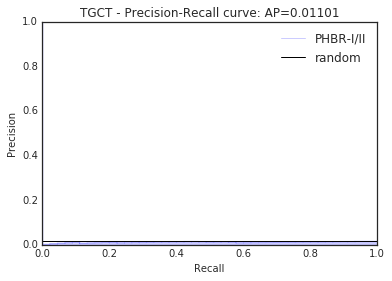

LAML


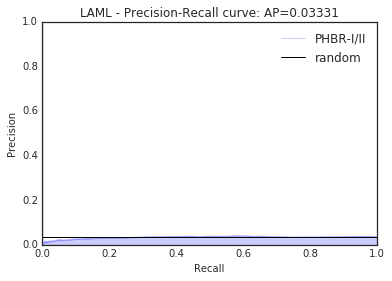

THYM
KICH


In [74]:
# against tissue specific mutations
for tissue in tissues_over_100:
    print tissue
    
    #for model in ['MHC_I', 'MHC_II', 'Both']:
     
    model = 'Both'
    try:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.muts_in_{0}.{1}.2.data.txt'.format(tissue, model),
                   sep=' ')
        precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)

        random = float(len(df[df.label == 1]))/len(df)

        plt.step(recall, precision, color='b', alpha=0.2,
                     where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2,
                         color='b')
        plt.axhline(random, c='k')

        plt.legend(('PHBR-I/II', 'random',))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.0])
        #plt.ylim([0.0, np.median(precision)*10.0])
        plt.xlim([0.0, 1.0])
        plt.title('{0} - Precision-Recall curve: AP={1}'.format(tissue, round(np.mean(precision), 5)))
        plt.show()
        plt.clf()
    except:
        None

BRCA


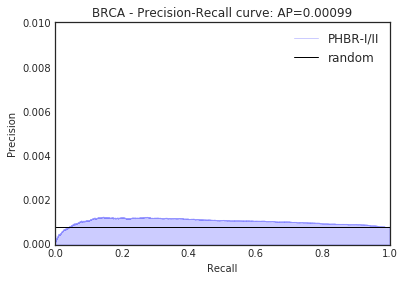

GBM


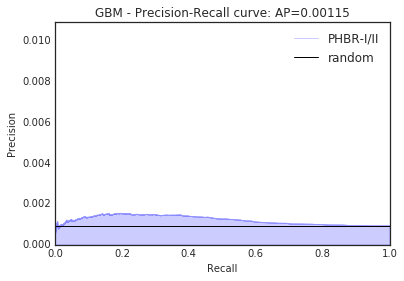

OV


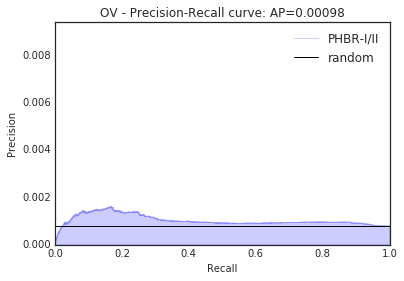

UCEC


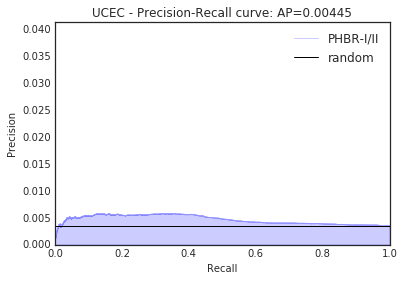

KIRC


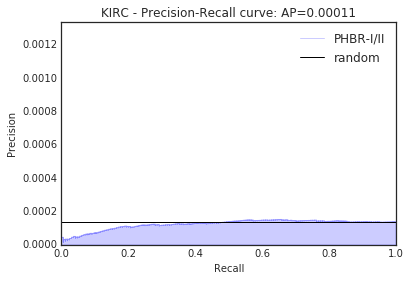

HNSC


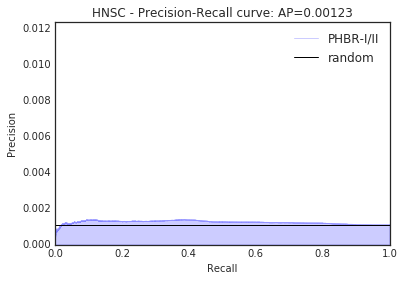

LUAD


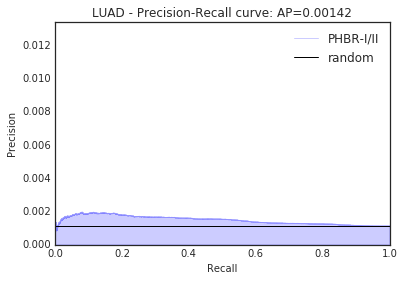

LGG


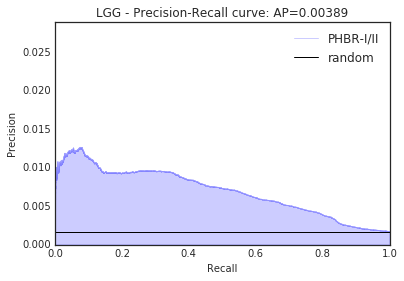

THCA


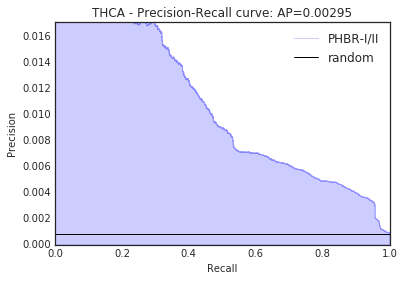

LUSC


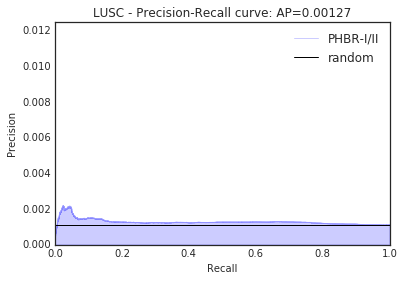

PRAD


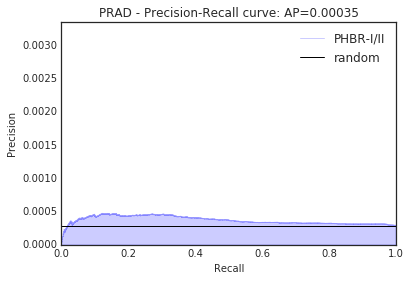

SKCM


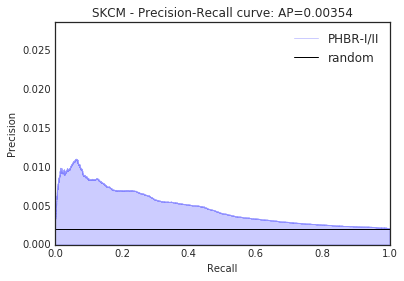

COAD


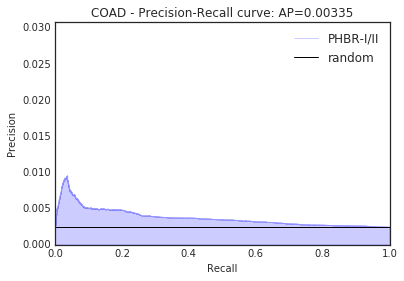

STAD


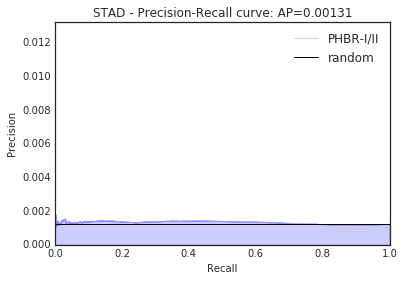

BLCA


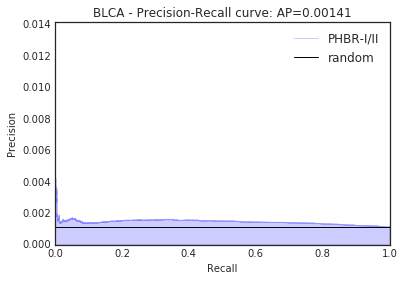

LIHC


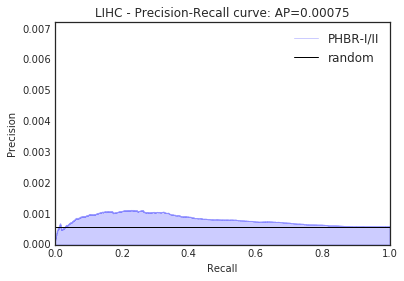

CESC


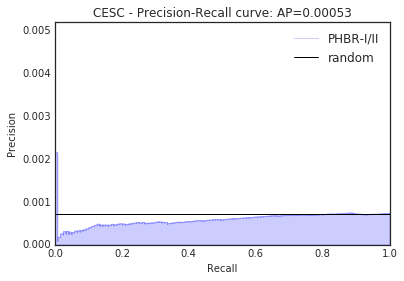

KIRP


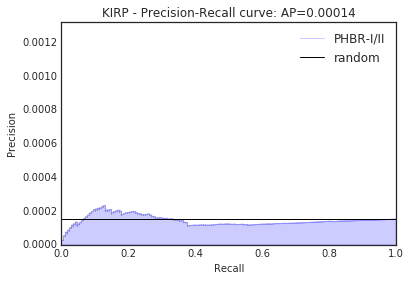

SARC
PAAD


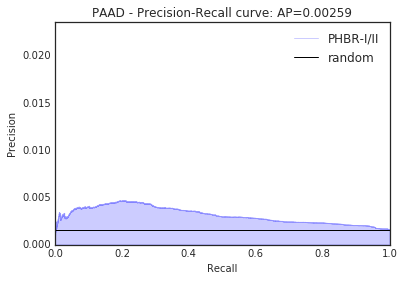

ESCA
PCPG


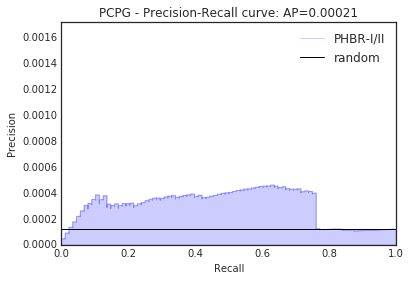

READ


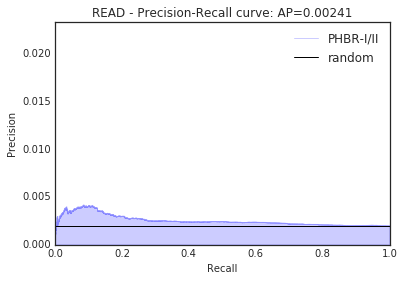

TGCT


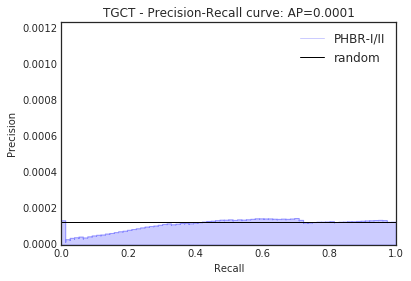

THYM
KICH


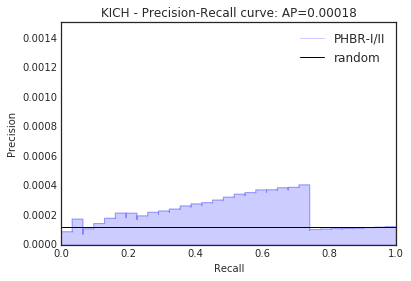

In [7]:
# against all mutations
for tissue in tissues_over_100:
    print tissue
    
    #for model in ['MHC_I', 'MHC_II', 'Both']:
     
    model = 'Both'
    try:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.{0}.{1}.2.data.txt'.format(tissue, model),
                   sep=' ')
        precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)

        random = float(len(df[df.label == 1]))/len(df)

        plt.step(recall, precision, color='b', alpha=0.2,
                     where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2,
                         color='b')
        plt.axhline(random, c='k')

        plt.legend(('PHBR-I/II', 'random',))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, np.median(precision)*10.0])
        plt.xlim([0.0, 1.0])
        plt.title('{0} - Precision-Recall curve: AP={1}'.format(tissue, round(np.mean(precision), 5)))
        plt.show()
        plt.clf()
    except:
        None

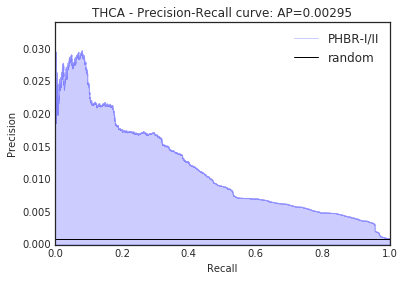

In [8]:
tissue='THCA'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tissues/predictions.{0}.{1}.2.data.txt'.format(tissue, model),
                   sep=' ')
precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)

random = float(len(df[df.label == 1]))/len(df)

plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.axhline(random, c='k')

plt.legend(('PHBR-I/II', 'random',))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, np.median(precision)*20.0])
plt.xlim([0.0, 1.0])
plt.title('{0} - Precision-Recall curve: AP={1}'.format(tissue, round(np.mean(precision), 5)))
plt.show()
plt.clf()

### Specific mutation, pan-cancer

In [23]:
mutations = [x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/')]

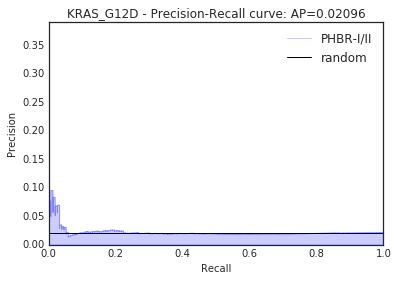

In [27]:
#for mutation in mutations:
for mutation in ['KRAS_G12D']:
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions/{0}.data.txt'.format(mutation),
                       sep=' ')
    precision, recall, thresholds = metrics.precision_recall_curve(df.label, df.predicted_prob)

    random = float(len(df[df.label == 1]))/len(df)

    plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.axhline(random, c='k')

    plt.legend(('PHBR-I/II', 'random',))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, np.median(precision)*20.0])
    plt.xlim([0.0, 1.0])
    plt.title('{0} - Precision-Recall curve: AP={1}'.format(mutation, round(np.mean(precision), 5)))
    plt.show()
    plt.clf()